<a href="https://colab.research.google.com/github/opticalcode/deeplearning2/blob/master/%E3%82%BC%E3%83%AD%E3%81%8B%E3%82%89%E4%BD%9C%E3%82%8B_Deep_Learning2_%E7%AC%AC1%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Google driveをマウントする
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1章 ニューラルネットワークの復習

1.1 数学とPythonの復習
* ベクトルや行列を拡張させて、N次元の数集まりをテンソルという

In [2]:
import numpy as np
x = np.array([1,2,3])
x.__class__

numpy.ndarray

In [3]:
x.shape

(3,)

In [4]:
x.ndim

1

In [5]:
W = np.array([[1,2,3],[4,4,6]])
W.shape

(2, 3)

In [6]:
W.ndim

2

1.1.2 行列の要素ごとの演算

In [7]:
W = np.array([[1,2,3],[4,5,6]])
X = np.array([[0,1,2],[3,4,5]])
W + X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [8]:
W * X

array([[ 0,  2,  6],
       [12, 20, 30]])

1.1.3 ブロードキャスト

In [9]:
A = np.array([[1,2],[3,4]])
A * 10

array([[10, 20],
       [30, 40]])

In [10]:
A = np.array([[1,2],[3,4]])
b = np.array([10,20])
A * b

array([[10, 40],
       [30, 80]])

In [11]:
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)

32

In [12]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A,B)

array([[19, 22],
       [43, 50]])

1.2.5 行列の形状チェック
* 行列の積では、対応する次元の要素数を一致させる。

1.2 ニューラルネットワークの推論
* ニューラルネットワークの処理は「学習」と「推論」に分かれる。

1.2.1 ニューラルネットワークの推論の全体図

In [0]:
import numpy as np
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
x = np.random.randn(10, 2)
h = np.dot(x, W1) + b1

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
a = sigmoid(h)    

In [0]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h = np.dot(x, W1) + b1
a = sigmoid(h)
s = np.dot(a, W2) + b2

1.2.2 レイヤとしてのクラス化と順伝播の実装

In [0]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []

    def forward(self, x):
        return 1 / (1 + np.exp(-x))   

In [0]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]

    def forward(self, x):
        W, b = self.params

        out = np.dot(x, W) + b
        return out        

In [0]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        #　重みとバイアスの初期化
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        #　レイヤの生成
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)          
        ]

        # 全ての重みをリストにまとめる
        self.params = []
        for layer in self.layers:
            self.params += layer.params

    def predict(self, x):
       for layer in self.layers:        
           x = layer.forward(x)
       return x    

In [19]:
a = ['A','B']
a += ['C','D']
a

['A', 'B', 'C', 'D']

In [0]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

1.3 ニューラルネットワークの学習
* 学習されたパラメータを利用して推論を行う

1.3.1 損失関数
* 損失関数として交差エントロピー誤差を用いる

1.3.2 微分と勾配
* ニューラルネットワークの学習の目標は、損失をできるだけ小さくすること。このとき重要になのが「微分」であり、「勾配」。

1.3.3 チェインルール
* 誤差伝播法を理解する上で、キーとなるのがチェインルール（連鎖率）。

1.3.4 計算グラフ
* 計算グラフは、計算を視覚的に表すもの。

1.3.4.1 乗算ノード
* 乗算ノードは、z=x * y という計算

1.3.4.2 分岐ノード
* 分岐ノードは、分岐するノードです。

１.3.4.3 Repeatノード
* 分岐ノードは2つの分岐だが、これを一般化させるとN個の分岐が考えらる。これをRepeatノードという。

In [0]:
import numpy as np
D, N = 8, 7
x = np.random.randn(1, D)
y = np.repeat(x, N, axis=0)

dy = np.random.randn(N, D)
dx = np.sum(dy, axis=0, keepdims=True)

1.3.4.4 Sumノード
* Sumノードは汎用的な加算ノードです。

In [0]:
import numpy as np
D, N = 8, 7
x = np.random.randn(N, D)
y = np.sum(x, axis=0, keepdims=True)

dy = np.random.randn(1, D)
dx = np.repeat(dy, N, axis=0)

1.3.4.5 MatMulノード
* 本書では、行列の積をMatMulノードとします。

In [0]:
class Matmul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.t)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...]= dW
        return dx        

In [0]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

1.3.5 勾配の導出と逆伝播の実装

1.3.5.1 Sigmoidレイヤ

In [0]:
class Sigmoid:
    def __init__(self):
        self.params, set.grads =[], []
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out)
        return dx        

1.3.5.2 Affineレイヤ

In [0]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out =np.dot(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0) 

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

1.3.5.3 Softmax with Lossレイヤ
* softmax関数と交差エントロピー誤差を合わせてそftmax with Lossレイヤとして実装します。

1.3.6 重みの更新
* 誤差逆伝播法によって勾配を求めることができたら、その勾配を使ってニューラルネットワークの学習を行います。
* パラメーターの更新に勾配降下法を使用します。
* ここではSGD（確率的勾配降下法）を使用します。

In [0]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = %ldir
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]    

1.4 ニューラルネットワークで問題を解く


In [0]:
import sys
sys.path.append('/content/drive/My Drive/deep-learning-from-scratch-2-master')
from dataset import spiral

In [29]:
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

x (300, 2)
t (300, 3)


1.4.2 ニューラルネットワークの実装

In [0]:
import sys
sys.path.append('/content/drive/My Drive/deep-learning-from-scratch-2-master/ch01')
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

In [0]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        #重みとバイアス初期化
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        #レイヤの生成
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)           
        ]
        self.loss_layer = SoftmaxWithLoss()

        #すべての重みと勾配をリストにまとめる
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return x

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout                         

In [47]:
#学習用のソースコード
import sys
sys.path.append('/content/drive/My Drive/deep-learning-from-scratch-2-master/ch01')
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet

#❶ハイパーパラメータの設定
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate =1.0

#❷データの読み込み、モデルとオプティマイザの生成
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 学習で使用する変数
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    #❸データのシャッフル
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

    #❹勾配を求め、パラメータを更新
    loss = model.forward(batch_x, batch_t)
    model.backward()
    optimizer.update(model.params, model.grads)

    total_loss += loss
    loss_count += 1

    #❺定期的に学習経過を出力
    if (iters+1) % 10 == 0:
        avg_loss = total_loss / loss_count
        print('\ epoch %d \ iter %d / %d \ loss %.2f'
              % (epoch + 1, iters + 1, max_iters, avg_loss))
        loss_list.append(avg_loss)
        total_loss, loss_count = 0, 0

\ epoch 1 \ iter 10 / 10 \ loss 1.10
\ epoch 2 \ iter 10 / 10 \ loss 1.12
\ epoch 3 \ iter 10 / 10 \ loss 1.10
\ epoch 4 \ iter 10 / 10 \ loss 1.08
\ epoch 5 \ iter 10 / 10 \ loss 1.18
\ epoch 6 \ iter 10 / 10 \ loss 1.22
\ epoch 7 \ iter 10 / 10 \ loss 1.24
\ epoch 8 \ iter 10 / 10 \ loss 1.13
\ epoch 9 \ iter 10 / 10 \ loss 1.12
\ epoch 10 \ iter 10 / 10 \ loss 1.20
\ epoch 11 \ iter 10 / 10 \ loss 1.22
\ epoch 12 \ iter 10 / 10 \ loss 1.22
\ epoch 13 \ iter 10 / 10 \ loss 1.10
\ epoch 14 \ iter 10 / 10 \ loss 1.12
\ epoch 15 \ iter 10 / 10 \ loss 1.24
\ epoch 16 \ iter 10 / 10 \ loss 1.32
\ epoch 17 \ iter 10 / 10 \ loss 1.16
\ epoch 18 \ iter 10 / 10 \ loss 1.10
\ epoch 19 \ iter 10 / 10 \ loss 1.13
\ epoch 20 \ iter 10 / 10 \ loss 1.12
\ epoch 21 \ iter 10 / 10 \ loss 1.06
\ epoch 22 \ iter 10 / 10 \ loss 1.42
\ epoch 23 \ iter 10 / 10 \ loss 1.11
\ epoch 24 \ iter 10 / 10 \ loss 1.17
\ epoch 25 \ iter 10 / 10 \ loss 1.06
\ epoch 26 \ iter 10 / 10 \ loss 1.24
\ epoch 27 \ iter 10 

In [44]:
import numpy as np
np.random.permutation(10)

array([5, 1, 8, 4, 9, 7, 0, 2, 6, 3])

In [45]:
np.random.permutation(10)

array([3, 4, 2, 7, 8, 5, 6, 0, 9, 1])

1.4.4 Trainerクラス

| epoch 1 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 2 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 3 |  iter 1 / 10 | time 0[s] | loss 1.13
| epoch 4 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 5 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 6 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 7 |  iter 1 / 10 | time 0[s] | loss 1.14
| epoch 8 |  iter 1 / 10 | time 0[s] | loss 1.16
| epoch 9 |  iter 1 / 10 | time 0[s] | loss 1.11
| epoch 10 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 11 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 12 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 13 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 14 |  iter 1 / 10 | time 0[s] | loss 1.09
| epoch 15 |  iter 1 / 10 | time 0[s] | loss 1.08
| epoch 16 |  iter 1 / 10 | time 0[s] | loss 1.04
| epoch 17 |  iter 1 / 10 | time 0[s] | loss 1.03
| epoch 18 |  iter 1 / 10 | time 0[s] | loss 0.94
| epoch 19 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 20 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 2

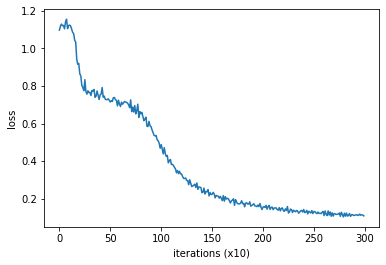

In [50]:
import sys
sys.path.append('/content/drive/My Drive/deep-learning-from-scratch-2-master/ch01')
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from two_layer_net import TwoLayerNet

batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

1.5 計算の高速化
* ニューラルネットワークはいかに高速に計算するかということが重要なテーマとなる。

1.5.1 ビット精度
* Numpyでは標準で64ビットの浮動小数点数が使われる。
* しかし、ニューラルネットワークの推論および学習は32ビットの浮動小数点数で問題なく行えることが知られている。
* Numpyで32ビット浮動小数点数を使うには、次のようにデータの型をnp.float32や'f'と指定する。

In [51]:
import numpy as np
a = np.random.randn(3)
a.dtype

dtype('float64')

In [52]:
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [54]:
c = np.random.randn(3).astype('f')
c.dtype

dtype('float32')

1.5.2 GPU(Cupy)
* ここから先はGoogle ColabのランタイムをGPUに切り替える。

In [4]:
import cupy as cp
x = cp.arange(6).reshape(2, 3).astype('f')
x

array([[0., 1., 2.],
       [3., 4., 5.]], dtype=float32)

In [5]:
x.sum(axis=1)

array([ 3., 12.], dtype=float32)

1.6 まとめ
* ニューラルネットワークの基本的な復習です。